## Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Functions

In [77]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    final_label = 1/(1+np.exp(-z))
    return final_label

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)
    #print("number",observations)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot(1-labels, np.log(1-predictions))
    
    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -cost.sum()/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features,weights)
    
    # Write down the gradient of the cost
    gradient = np.dot((predictions-labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - (lr*gradient)

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [64]:
data = pd.read_csv('titanic_train.csv', delimiter=",");data.head()
# print a snippet of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [67]:
gender=pd.get_dummies(data['Sex'],drop_first=True)

In [68]:
data['Gender']=gender

In [69]:
data.drop(['Name', 'Sex','Ticket', 'Embarked','Cabin'],axis=1,inplace=True);data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [70]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender'],
      dtype='object')

In [123]:
X = data[['Age', 'Gender']]
y = data['Survived']

In [124]:
scaler = preprocessing.StandardScaler().fit(X)
X= scaler.transform(X)#scaling of data#  can be used np.array

In [125]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [126]:
scaler = preprocessing.StandardScaler().fit(X)
X= scaler.transform(X)#scaling of data#  can be used np.array

In [127]:
# Initialize the weights
wts = np.zeros(X.shape[1])

# Training
optimal_wts, loss = train(X_train, y_train, wts, .000001, 1000)

iter: 0 cost: 0.693122232068631
iter: 1 cost: 0.6930972881462778
iter: 2 cost: 0.6930723487920428
iter: 3 cost: 0.6930474140050843
iter: 4 cost: 0.6930224837845598
iter: 5 cost: 0.6929975581296272
iter: 6 cost: 0.6929726370394447
iter: 7 cost: 0.6929477205131707
iter: 8 cost: 0.6929228085499634
iter: 9 cost: 0.6928979011489811
iter: 10 cost: 0.6928729983093825
iter: 11 cost: 0.6928481000303266
iter: 12 cost: 0.6928232063109719
iter: 13 cost: 0.6927983171504776
iter: 14 cost: 0.6927734325480026
iter: 15 cost: 0.6927485525027064
iter: 16 cost: 0.692723677013748
iter: 17 cost: 0.6926988060802872
iter: 18 cost: 0.6926739397014835
iter: 19 cost: 0.6926490778764967
iter: 20 cost: 0.6926242206044865
iter: 21 cost: 0.6925993678846131
iter: 22 cost: 0.6925745197160363
iter: 23 cost: 0.6925496760979166
iter: 24 cost: 0.6925248370294144
iter: 25 cost: 0.69250000250969
iter: 26 cost: 0.6924751725379042
iter: 27 cost: 0.6924503471132176
iter: 28 cost: 0.6924255262347914
iter: 29 cost: 0.69240070990

iter: 281 cost: 0.6862896502106683
iter: 282 cost: 0.6862659572566265
iter: 283 cost: 0.6862422686389945
iter: 284 cost: 0.6862185843569655
iter: 285 cost: 0.6861949044097329
iter: 286 cost: 0.6861712287964901
iter: 287 cost: 0.6861475575164308
iter: 288 cost: 0.6861238905687485
iter: 289 cost: 0.6861002279526374
iter: 290 cost: 0.6860765696672914
iter: 291 cost: 0.6860529157119045
iter: 292 cost: 0.686029266085671
iter: 293 cost: 0.6860056207877854
iter: 294 cost: 0.685981979817442
iter: 295 cost: 0.6859583431738356
iter: 296 cost: 0.6859347108561609
iter: 297 cost: 0.6859110828636127
iter: 298 cost: 0.6858874591953861
iter: 299 cost: 0.6858638398506761
iter: 300 cost: 0.6858402248286781
iter: 301 cost: 0.6858166141285874
iter: 302 cost: 0.6857930077495995
iter: 303 cost: 0.6857694056909102
iter: 304 cost: 0.685745807951715
iter: 305 cost: 0.6857222145312099
iter: 306 cost: 0.685698625428591
iter: 307 cost: 0.6856750406430543
iter: 308 cost: 0.6856514601737961
iter: 309 cost: 0.685627

iter: 519 cost: 0.6807712534425373
iter: 520 cost: 0.6807485700806934
iter: 521 cost: 0.6807258908668049
iter: 522 cost: 0.6807032158000952
iter: 523 cost: 0.6806805448797874
iter: 524 cost: 0.680657878105105
iter: 525 cost: 0.6806352154752718
iter: 526 cost: 0.6806125569895114
iter: 527 cost: 0.6805899026470478
iter: 528 cost: 0.6805672524471047
iter: 529 cost: 0.6805446063889062
iter: 530 cost: 0.6805219644716767
iter: 531 cost: 0.6804993266946404
iter: 532 cost: 0.6804766930570219
iter: 533 cost: 0.6804540635580456
iter: 534 cost: 0.6804314381969362
iter: 535 cost: 0.6804088169729188
iter: 536 cost: 0.6803861998852181
iter: 537 cost: 0.6803635869330593
iter: 538 cost: 0.6803409781156678
iter: 539 cost: 0.6803183734322689
iter: 540 cost: 0.6802957728820875
iter: 541 cost: 0.6802731764643498
iter: 542 cost: 0.6802505841782814
iter: 543 cost: 0.6802279960231081
iter: 544 cost: 0.6802054119980557
iter: 545 cost: 0.6801828321023506
iter: 546 cost: 0.6801602563352188
iter: 547 cost: 0.680

iter: 784 cost: 0.6749029010979903
iter: 785 cost: 0.6748812901559852
iter: 786 cost: 0.6748596831604592
iter: 787 cost: 0.6748380801106687
iter: 788 cost: 0.6748164810058702
iter: 789 cost: 0.6747948858453199
iter: 790 cost: 0.6747732946282746
iter: 791 cost: 0.6747517073539913
iter: 792 cost: 0.6747301240217266
iter: 793 cost: 0.6747085446307375
iter: 794 cost: 0.6746869691802814
iter: 795 cost: 0.6746653976696152
iter: 796 cost: 0.6746438300979964
iter: 797 cost: 0.6746222664646827
iter: 798 cost: 0.6746007067689318
iter: 799 cost: 0.6745791510100011
iter: 800 cost: 0.6745575991871486
iter: 801 cost: 0.6745360512996326
iter: 802 cost: 0.6745145073467107
iter: 803 cost: 0.6744929673276416
iter: 804 cost: 0.6744714312416835
iter: 805 cost: 0.6744498990880949
iter: 806 cost: 0.6744283708661345
iter: 807 cost: 0.6744068465750609
iter: 808 cost: 0.674385326214133
iter: 809 cost: 0.6743638097826101
iter: 810 cost: 0.6743422972797509
iter: 811 cost: 0.6743207887048149
iter: 812 cost: 0.674

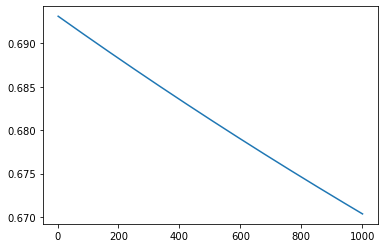

In [128]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [129]:
predictions = []
for elem in predict(X, optimal_wts):
    predictions.append(decision_boundary(elem))

In [130]:
train_predictions = []
for i in predict(X_train, optimal_wts):
    train_predictions.append(decision_boundary(i))
test_predictions = []
for i in predict(X_test, optimal_wts):
    test_predictions.append(decision_boundary(i))

In [131]:
X.T[1]
X.T[0]

array([-5.92480600e-01,  6.38789012e-01, -2.84663197e-01,  4.07925960e-01,
        4.07925960e-01, -2.23290646e-16,  1.87005862e+00, -2.13156761e+00,
       -2.07708846e-01, -1.20811541e+00, -1.97765891e+00,  2.17787603e+00,
       -7.46389301e-01,  7.15743363e-01, -1.20811541e+00,  1.94701297e+00,
       -2.13156761e+00, -2.23290646e-16,  1.00108557e-01, -2.23290646e-16,
        4.07925960e-01,  3.30971609e-01, -1.13116105e+00, -1.30754495e-01,
       -1.66984151e+00,  6.38789012e-01, -2.23290646e-16, -8.23343652e-01,
       -2.23290646e-16, -2.23290646e-16,  7.92697714e-01, -2.23290646e-16,
       -2.23290646e-16,  2.79351083e+00, -1.30754495e-01,  9.46606415e-01,
       -2.23290646e-16, -6.69434951e-01, -9.00298003e-01, -1.20811541e+00,
        7.92697714e-01, -2.07708846e-01, -2.23290646e-16, -2.05461326e+00,
       -8.23343652e-01, -2.23290646e-16, -2.23290646e-16, -2.23290646e-16,
       -2.23290646e-16, -9.00298003e-01, -1.74679586e+00, -6.69434951e-01,
        1.48528687e+00, -

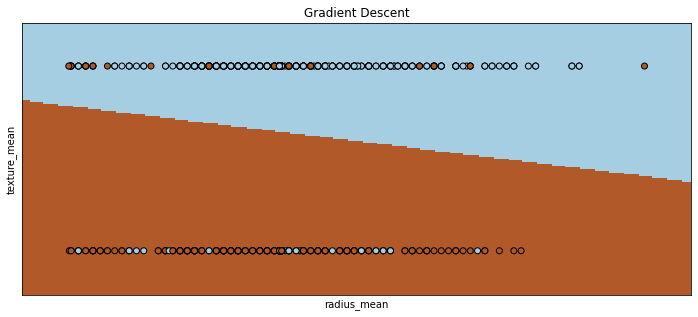

In [132]:
# # Plot the decision boundary for two features. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.T[0].min() - 0.5, X_train.T[0].max() + 0.5
y_min, y_max = X_train.T[1].min() - 0.5, X_train.T[1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts[[0,1]])
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
# # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired,shading="auto")

# # Plot also the training points

plt.scatter(X_train.T[0], X_train.T[1],c=y_train, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [133]:
# Accuracy
print("Accuracy using gradient descent: {}".format(accuracy(test_predictions,y_test)))  

Accuracy using gradient descent: 0.7932960893854748


## Scikit-Learn module

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [136]:
predicted_lbfgs = clf_lbfgs.predict(X_test)
predicted_newton = clf_newt.predict(X_test)

In [137]:
print("Accuracy using LBFGS method: {}".format(accuracy(predicted_lbfgs,y_test)))
print("Accuracy using NEWTON-CG method: {}".format(accuracy(predicted_newton,y_test)))

Accuracy using LBFGS method: 0.7932960893854748
Accuracy using NEWTON-CG method: 0.7932960893854748


<ipython-input-138-51e077db5e59>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)
<ipython-input-138-51e077db5e59>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired)


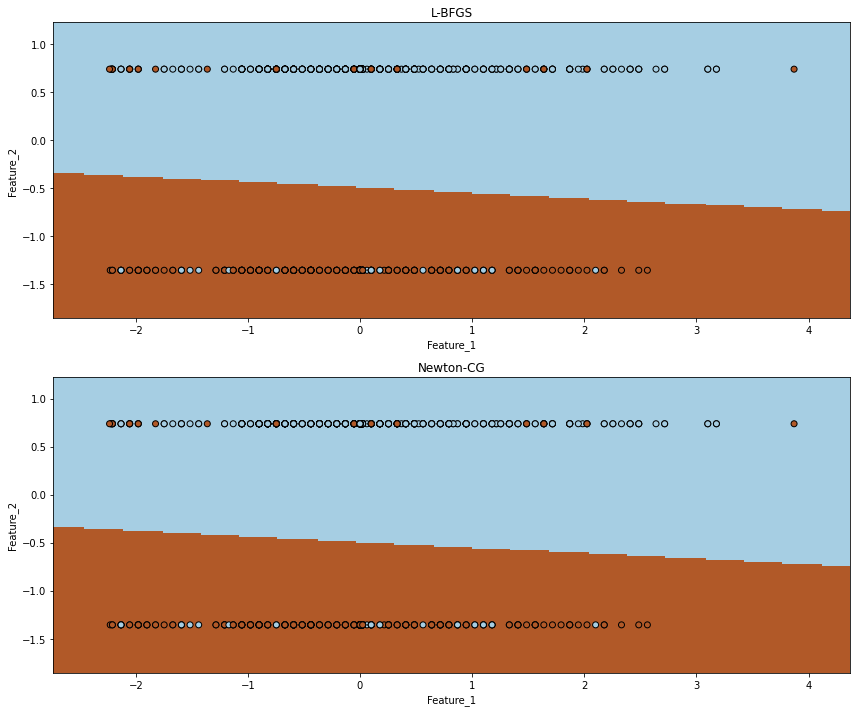

In [138]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max =  X_train.T[0].min() - 0.5, X_train.T[0].max() + 0.5
y_min, y_max =  X_train.T[1].min() - 0.5, X_train.T[1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_lbfgs = clf_lbfgs.predict(np.c_[xx.ravel(), yy.ravel()])
Z_newt = clf_newt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_lbfgs = Z_lbfgs.reshape(xx.shape)
Z_newt = Z_newt.reshape(xx.shape)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)

# Plot also the training points
ax1.scatter(X_train.T[0], X_train.T[1],c=y_train, edgecolors="k", cmap=plt.cm.Paired)
ax1.set_xlabel("Feature_1")
ax1.set_ylabel("Feature_2")

ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_title('L-BFGS')
#ax1.set_xticks(())
#ax1.set_yticks(())

ax2 = plt.subplot(2, 1, 2)
ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired)

# Plot also the training points
ax2.scatter(X_train.T[0], X_train.T[1],c=y_train, edgecolors="k", cmap=plt.cm.Paired)
ax2.set_xlabel("Feature_1")
ax2.set_ylabel("Feature_2")

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_title('Newton-CG')
#ax1.set_xticks(())
#ax1.set_yticks(())
plt.tight_layout()
plt.show()